# TP n° 8 - Algorithmes de tri: applications

## Tri par sélection: algorithme de base

Voici l'algorithme du tri par sélection étudié en classe.

In [1]:
def tri_sélection(t):
    for i in range(len(t)):
        mini = t[i]
        indice_mini = i
        for j in range(i + 1, len(t)):
            if t[j] < mini:
                mini = t[j]
                indice_mini = j
        t[i], t[indice_mini] = t[indice_mini], t[i]

On teste cet algorithme sur une liste de nombres aléatoires:

In [2]:
from random import randint
N = 20
# On tire une liste de N nombres compris entre 0 et N.
t = [randint(0, N) for _ in range(N)]

print("Liste non triée", t)

tri_sélection(t)
print("Liste triée", t)

Liste non triée [2, 19, 18, 3, 11, 2, 5, 14, 19, 5, 14, 3, 4, 3, 4, 11, 9, 20, 12, 4]
Liste triée [2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 9, 11, 11, 12, 14, 14, 18, 19, 19, 20]


## Application 1 : ordre croissant / décroissant

On aimerait trier la liste par ordre décroissant plutôt que croissant. Il y a plusieurs façons de réaliser cela:

### Méthode 1: renversement de la liste triée

Une première méthode consiste à trier dans l'ordre croissant, puis à inverser le tableau trié:

In [3]:
def tri_sélection_décroissant_1(t):
    # Tri selon l'ordre croissant
    tri_sélection(t)
    
    # On renverse la liste. On pourrait utiliser t.reverse(), mais on va le faire à la main ici,
    # puisque l'on a déjà étudié cet algorithme en classe.
    
    i = 0
    j = len(t) - 1
    # Tant que i est avant j on échange les éléments correspondants:
    while i < j:
        t[i], t[j] = t[j], t[i]
        i = i + 1
        j = j - 1

Testons cette fonction:

In [4]:
from random import randint
N = 20
# On tire une liste de N nombres compris entre 0 et N.
t = [randint(0, N) for _ in range(N)]

print("Liste non triée", t)

tri_sélection_décroissant_1(t)
print("Liste triée", t)

Liste non triée [16, 10, 5, 1, 13, 8, 2, 6, 14, 1, 1, 1, 2, 16, 1, 20, 12, 18, 0, 16]
Liste triée [20, 18, 16, 16, 16, 14, 13, 12, 10, 8, 6, 5, 2, 2, 1, 1, 1, 1, 1, 0]


### Méthode 2: on change l'algorithme de tri

Il suffit pour cela de chercher le maximum plutôt que le minimum dans la partie non triée du tableau (entre l'indice i et la fin du tableau):

In [5]:
def tri_sélection_décroissant_2(t):
    for i in range(len(t)):
        maxi = t[i]
        indice_maxi = i
        for j in range(i + 1, len(t)):
            # Seul le < est changé en >: c'est la seule modification entre les deux algorithmes.
            if t[j] > maxi:
                maxi = t[j]
                indice_maxi = j
        t[i], t[indice_maxi] = t[indice_maxi], t[i]

Et le test:

In [6]:
from random import randint
N = 20
# On tire une liste de N nombres compris entre 0 et N.
t = [randint(0, N) for _ in range(N)]

print("Liste non triée", t)

tri_sélection_décroissant_2(t)
print("Liste triée", t)

Liste non triée [8, 6, 7, 3, 17, 16, 10, 8, 20, 17, 7, 0, 14, 6, 9, 4, 2, 2, 15, 9]
Liste triée [20, 17, 17, 16, 15, 14, 10, 9, 9, 8, 8, 7, 7, 6, 6, 4, 3, 2, 2, 0]


### Méthode 3: écriture d'une fonction pouvant trier dans les deux sens

La meilleure méthode (et de loin !) consiste à ajouter un paramètre optionnel à la fonction de tri afin d'offrir la possibilité de trier dans un sens ou dans l'autre. À partir de maintenant, c'est la fonction de tri que l'on utilisera:

In [7]:
def tri_sélection(t, croissant=True):
    """Trie le tableau t.
    
    Le paramètre optionnel croissant est un booléen indiquant s'il faut trier dans l'ordre
    croissant ou non. Par défaut (si le paramètre n'est pas inclus), le tri se fera dans
    l'ordre croissant.
    """
    
    for i in range(len(t)):
        m = t[i]
        indice_m = i
        for j in range(i + 1, len(t)):
            # Selon la valeur de croissant, il faut tester une inégalité ou l'autre: selon le cas,
            # on recherchera donc le minimum (si croissant est True) ou le maximum sur
            # la partie non triée
            if (croissant is True and t[j] < m) or (croissant is False and t[j] > m):
                m = t[j]
                indice_m = j
        t[i], t[indice_m] = t[indice_m], t[i]

Et un triple test:

In [8]:
from random import randint
N = 20
# On tire une liste de N nombres compris entre 0 et N.
t = [randint(0, N) for _ in range(N)]

print("Liste non triée", t)

# Pas de paramètre optionnel: l'ordre doit être croissant par défaut.
tri_sélection(t)
print("Liste triée", t)

Liste non triée [2, 19, 13, 6, 2, 9, 13, 8, 8, 3, 19, 14, 3, 16, 13, 16, 5, 0, 15, 9]
Liste triée [0, 2, 2, 3, 3, 5, 6, 8, 8, 9, 9, 13, 13, 13, 14, 15, 16, 16, 19, 19]


In [9]:
from random import randint
N = 20
# On tire une liste de N nombres compris entre 0 et N.
t = [randint(0, N) for _ in range(N)]

print("Liste non triée", t)

# On peut explicitement demander un ordre croissant (plus lisible):
tri_sélection(t, croissant=True)
print("Liste triée", t)

Liste non triée [5, 4, 3, 4, 20, 12, 7, 17, 19, 18, 10, 4, 14, 12, 7, 13, 2, 5, 19, 4]
Liste triée [2, 3, 4, 4, 4, 4, 5, 5, 7, 7, 10, 12, 12, 13, 14, 17, 18, 19, 19, 20]


In [10]:
from random import randint
N = 20
# On tire une liste de N nombres compris entre 0 et N.
t = [randint(0, N) for _ in range(N)]

print("Liste non triée", t)

# On veut un tri dans l'ordre décroissant:
tri_sélection(t, croissant=False)
print("Liste triée", t)

Liste non triée [16, 11, 14, 7, 4, 4, 13, 6, 9, 6, 20, 3, 3, 18, 17, 15, 19, 2, 1, 19]
Liste triée [20, 19, 19, 18, 17, 16, 15, 14, 13, 11, 9, 7, 6, 6, 4, 4, 3, 3, 2, 1]


### Méthode 4: modification de la liste avant le tri pour inverser l'ordre

La technique proposée ici est très astucieuse, elle utilise le fait que les nombres négatifs sont triés dans l'ordre inverse: $$a > b \Longleftrightarrow -a < -b$$

L'astuce consiste alors à changer le signe de tous les nombres, trier le tableau dans l'ordre croissant, puis rechanger les signes. Cela ne nécessite aucune modification de la fonction de tri:

In [11]:
from random import randint
N = 20
# On tire une liste de N nombres compris entre 0 et N.
t = [randint(0, N) for _ in range(N)]

print("Liste non triée", t)

# On change les signes:
t = [-n for n in t]
print("Avant tri:", t)
tri_sélection(t)
print("Après tri", t)

# On rechange les signes
t = [-n for n in t]
print("Liste triée dans l'ordre décroissant", t)

Liste non triée [0, 7, 2, 13, 19, 12, 7, 0, 8, 18, 0, 7, 0, 17, 12, 13, 14, 5, 1, 9]
Avant tri: [0, -7, -2, -13, -19, -12, -7, 0, -8, -18, 0, -7, 0, -17, -12, -13, -14, -5, -1, -9]
Après tri [-19, -18, -17, -14, -13, -13, -12, -12, -9, -8, -7, -7, -7, -5, -2, -1, 0, 0, 0, 0]
Liste triée dans l'ordre décroissant [19, 18, 17, 14, 13, 13, 12, 12, 9, 8, 7, 7, 7, 5, 2, 1, 0, 0, 0, 0]


**Remarque très importante:** Cette technique sera très utile pour trier sur des données plus complexes, comme des tuples ou des dictionnaires.

## Application 2 : Tri sur une copie d'un tableau

Il n'est pas toujours pratique que le tableau que l'on souhaite trier soit modifié en place: dans de nombreuses situations, on souhaite obtenir une *copie triée* du tableau, sans que le tableau initial ne soit modifié.

On peut réutiliser la fonction de tri existante, à condition de copier le tableau au préalable:

In [12]:
def copie_triée(t, croissant=True):
    """Copie le tableau t, puis le trie par ordre croissant ou décroissant, selon
    la valeur du booléen 'croissant' passé en paramètre.
    """
    
    # On commence par créer une copie du tableau:
    n = len(t)
    copie = [0] * n
    
    for i in range(n):
        copie[i] = t[i]
        
    # puis on la trie (le tableau 'copie' sera modifié en place)
    tri_sélection(copie, croissant)
    
    # Enfin, on renvoie la copie
    return copie

Testons que le comportement de cette fonction répond bien au cahier des charges:

In [13]:
from random import randint
N = 20
# On tire une liste de N nombres compris entre 0 et N.
t = [randint(0, N) for _ in range(N)]

print("Liste initiale: t =", t)
copie = copie_triée(t, croissant=False)
print("Copie triée: copie =", copie)
print("Liste initiale: t =", t)


Liste initiale: t = [3, 4, 18, 15, 12, 6, 10, 16, 17, 12, 18, 18, 8, 4, 5, 10, 2, 4, 3, 16]
Copie triée: copie = [18, 18, 18, 17, 16, 16, 15, 12, 12, 10, 10, 8, 6, 5, 4, 4, 4, 3, 3, 2]
Liste initiale: t = [3, 4, 18, 15, 12, 6, 10, 16, 17, 12, 18, 18, 8, 4, 5, 10, 2, 4, 3, 16]


## Application 3 : Tri sur des tuples

### Ordre lexicographique

Pour que l'algorithme de tri proposé en début de TP fonctionne, il suffit que les données soient comparables (c'est-à-dire, qu'il est possible d'utiliser un opérateur de comparaison comme```<``` entre deux telles valeurs). 

* Les nombres sont évidemment comparables, c'est une propriété mathématique des nombres.
* Les chaînes de caractères sont comparables suivant l'ordre du dictionnaire, encore appelé **ordre lexicographique** en mathématiques: on compare les premières lettres. En cas d'égalité, on compare les secondes. En cas d'égalité, on compare les troisièmes, et ainsi de suite. Dès qu'une des comparaison n'est pas une égalité (ou bien si un des mots est plus court que l'autre), on connait l'ordre entre les deux mots. Si toutes les comparaisons ont donné une égalité, les deux mots sont égaux.
* En python, les tuples sont automatiquement comparés suivant ce même ordre lexicographie. Plus précisément, si $t_1= (x_1, x_2, \ldots, x_n)$ et $t_2 = (y_1, y_2, \ldots, y_m)$ sont deux tuples, l'algorithme de comparaison procède comme suit:

  - Si $x_1 < y_1$, alors $t_1 < t_2$;
  - Sinon si $x_2 < y_2$, alors $t_1 < t_2$;
  - On continue les tests jusqu'à ce qu'un des tuples ne contienne plus de composante (il était plus court au départ). Si on tombe sur une égalité, le tuple le plus court sera considéré comme inférieur à l'autre.
  - Si tous les tests ont été égaux, alors $t_1 = t_2$.
  
  Ce algorithme est un excellent exercice d'application:


---
#### Exercice 1 : ordre lexicographique sur des tuples.

Écrire une fonction ```compare_tuples(t1, t2)``` Retournant 1 si ```t1 > t2```, -1 si ```t1 < t2``` et 0 en cas d'égalité.

In [38]:
def compare_tuples(t1, t2):
    """Écrire la documentation de la fonction ici"""
    
    pass

Et voici une cellule de tests automatisés:

In [15]:
from random import randint

try:
    # Quelques tests sur des longueurs différentes mais des valeurs égales:
    for i in range(6):
        for j in range(6):
            t1 = tuple([1 for _ in range(i)])
            t2 = tuple([1 for _ in range(j)])
            comp = compare_tuples(t1, t2)
            assert comp in [-1, 0, 1]
            assert (comp == -1 and t1 < t2) or (comp == 0 and t1 == t2) or (comp == 1 and t1 > t2)
            
    # puis sur des tuples complètement aléatoires:
    for _ in range(100):
        t1 = tuple([randint(0, 5) for _ in range(randint(1, 5))])
        t2 = tuple([randint(0, 5) for _ in range(randint(1, 5))])
        comp = compare_tuples(t1, t2)
        assert comp in [-1, 0, 1]
        assert (comp == -1 and t1 < t2) or (comp == 0 and t1 == t2) or (comp == 1 and t1 > t2)
except Exception as e:
    raise e
else:
    print("Tous les tests ont été passés avec succès !")

Tous les tests ont été passés avec succès !


### Tri par défaut sur des tuples

Que se passe-t-il lorsqu'on utilise l'ordre lexicographique par défaut sur des tuples:

In [16]:
t1 = [
    ('Pascal', 'Blaise', 1623),
    ('Emmanuel', 'Kant', 1724),
    ('Friedrich', 'Nietzsche', 1844),
    ('René', 'Descartes', 1596)
]

In [17]:
copie_triée(t1)

[('Emmanuel', 'Kant', 1724),
 ('Friedrich', 'Nietzsche', 1844),
 ('Pascal', 'Blaise', 1623),
 ('René', 'Descartes', 1596)]

On constate que l'ordre lexicographique (utilisé par python) trie d'abord suivant le prénom, puis suivant le nom. Cela est d'ailleurs beaucoup plus visible sur une liste avec beaucoup de doublons:

In [18]:
def crée_liste_élèves(taille):
    prénoms = [
        "Théo", "Quentin", "Maxime", "Jules", "Gaspard", 
        "Valentin", "Mickaël", "Julien", "Maxens", "Gabin",
        "Perrine", "Zoé", "Séraphine", "Sophie", "Claire",
        "Amandine", "Julia", "Julie", "Céline", "Célia"
    ]

    noms = [
        "Legoff", "Dupont", "Dupuis", "Dubois", "Legrand",
        "Ledouble", "Duchemin", "Valois", "Fresnet", "Galois"
    ]

    classes = ["1ère 1", "1ère 2", "1ère 3"]

    from random import choice
    def élève_aléatoire():
        return choice(prénoms), choice(noms), choice(classes)

    liste_élèves = [élève_aléatoire() for _ in range(taille)]
    return liste_élèves

In [19]:
liste_élèves = crée_liste_élèves(20)

In [20]:
copie_triée(liste_élèves)

[('Amandine', 'Dubois', '1ère 2'),
 ('Céline', 'Legoff', '1ère 3'),
 ('Gabin', 'Dupont', '1ère 3'),
 ('Gabin', 'Ledouble', '1ère 3'),
 ('Gaspard', 'Duchemin', '1ère 2'),
 ('Jules', 'Dupuis', '1ère 2'),
 ('Jules', 'Fresnet', '1ère 2'),
 ('Julie', 'Dubois', '1ère 2'),
 ('Julien', 'Legoff', '1ère 2'),
 ('Julien', 'Legoff', '1ère 2'),
 ('Maxens', 'Dubois', '1ère 1'),
 ('Maxens', 'Valois', '1ère 1'),
 ('Maxime', 'Dubois', '1ère 1'),
 ('Perrine', 'Duchemin', '1ère 1'),
 ('Quentin', 'Dubois', '1ère 1'),
 ('Quentin', 'Ledouble', '1ère 3'),
 ('Séraphine', 'Galois', '1ère 3'),
 ('Théo', 'Legoff', '1ère 3'),
 ('Valentin', 'Dupuis', '1ère 3'),
 ('Valentin', 'Galois', '1ère 3')]

Une question primordiale se pose: comment réaliser un tri plus *naturel*, d'abord sur le nom de famille, puis sur le prénom., et enfin sur la classe ?

---
#### Exercice 2: modification des tuples

À partir de la ```liste_élèves``` précédente, créer une nouvelle liste pour laquelle l'ordre des composantes du tuple sera (nom, prénom, classe). Trier cette nouvelle liste.

In [21]:
# Écrire votre code ici

---
#### Exercice 4: 

L'exercice précédent donne bien le bon résultat, mais a un gros défaut: la liste triée n'est pas constituée des tuples originaux, mais de tuples modifiés.

Il serait préférable d'utiliser les tuples modifiés pour trier la liste, mais de reconstruire les tuples dans le bon ordre pour donner le résultat.

Réalisez cela pour ce nouvel exercice !

In [22]:
# Écrire votre code ici

Cet exercice ressemble à s'y méprendre à ce que nous avions fait avec les listes de nombres en passant par les nombres opposés: le principe est absolument identique:
* On modifie le tuple afin que l'ordre lexicographique corresponde à ce que l'on souhaite obtenir
* On effectue le tri
* On reconstruit les tuples initiaux.   

Cependant, il y a moyen de s'épargner ce double travail de modification de données, très coûteux et source potentielle de bugs: voir l'exercice suivant

---
#### Exercice 5 : Tri sans modifier les données initiales

Comment faire pour trier la liste dans l'ordre (nom, prénom, classe) sans pour autant modifier les données ?

Une idée très simple: on modifie légèrement l'algorithme de tri. Pour l'unique ligne de code pour laquelle une comparaison est effectuée, on utilise les tuples modifiés plutôt que les tuples initiaux.

Cela change tout:
* On n'est pas obligé de modifier la liste initiale
* On crée simplement des tuples modifiés pour la comparaison
* Ce sont les valeurs initiales qui sont échangées, pas les valeurs modifiées: il n'y a donc pas besoin de reconstruire les données à la fin.

Modifier la fonction suivante, afin qu'elle compare les tuples modifiés plutôt que les tuples initiaux. Bien évidemment, cette fonction ne fonctionnera que pour les listes d'élèves, pas dans le cas général (ce qui est un problème, mais nous le résoudrons à l'exercice suivant).

Pour cela, écrire (puis utiliser) la fonction ```tuple_modifié(élève)```, qui renvoie le tuple au format (nom, prénom, classe) à partir du tuple (prénom, nom, classe).

In [23]:
def tuple_modifié(élève):
    pass

In [24]:
def tri_liste_élèves(t, croissant=True):
    """Trie le tableau t de tuples sous la forme (prénom, nom, classe).
    
    L'ordre du tri doit se faire suivant les tuples modifiés (nom, prénom, classe).
    
    Le paramètre optionnel croissant est un booléen indiquant s'il faut trier dans l'ordre
    croissant ou non. Par défaut (si le paramètre n'est pas inclus), le tri se fera dans
    l'ordre croissant.
    """
    
    # Modifier le code ci-dessous
    
    for i in range(len(t)):
        m = t[i]
        indice_m = i
        for j in range(i + 1, len(t)):
            # Selon la valeur de croissant, il faut tester une inégalité ou l'autre: selon le cas,
            # on recherchera donc le minimum (si croissant est True) ou le maximum sur
            # la partie non triée
            if (croissant is True and t[j] < m) or (croissant is False and t[j] > m):
                m = t[j]
                indice_m = j
        t[i], t[indice_m] = t[indice_m], t[i]

Testez le résultat sur une liste d'élèves:

In [25]:
liste_élèves = crée_liste_élèves(20)
print("Liste initiale:\n")
liste_élèves

Liste initiale:



[('Valentin', 'Duchemin', '1ère 1'),
 ('Amandine', 'Ledouble', '1ère 2'),
 ('Gaspard', 'Legoff', '1ère 2'),
 ('Théo', 'Dupuis', '1ère 1'),
 ('Julien', 'Dupont', '1ère 1'),
 ('Maxens', 'Dupont', '1ère 2'),
 ('Julien', 'Legoff', '1ère 3'),
 ('Julien', 'Legoff', '1ère 1'),
 ('Sophie', 'Fresnet', '1ère 2'),
 ('Maxens', 'Ledouble', '1ère 2'),
 ('Sophie', 'Duchemin', '1ère 2'),
 ('Théo', 'Dupuis', '1ère 2'),
 ('Maxens', 'Dubois', '1ère 1'),
 ('Amandine', 'Fresnet', '1ère 2'),
 ('Perrine', 'Legrand', '1ère 2'),
 ('Zoé', 'Legrand', '1ère 2'),
 ('Célia', 'Fresnet', '1ère 1'),
 ('Gabin', 'Dupuis', '1ère 3'),
 ('Julia', 'Duchemin', '1ère 3'),
 ('Quentin', 'Dubois', '1ère 1')]

In [26]:
# On est obligé de modifier la liste en place, parce que la fonction copie_triée() n'utilise pas
# la fonction trie_liste_élèves mais la fonction tri_sélection
tri_liste_élèves(liste_élèves)
print("\n\nListe triée:\n")
liste_élèves



Liste triée:



[('Amandine', 'Fresnet', '1ère 2'),
 ('Amandine', 'Ledouble', '1ère 2'),
 ('Célia', 'Fresnet', '1ère 1'),
 ('Gabin', 'Dupuis', '1ère 3'),
 ('Gaspard', 'Legoff', '1ère 2'),
 ('Julia', 'Duchemin', '1ère 3'),
 ('Julien', 'Dupont', '1ère 1'),
 ('Julien', 'Legoff', '1ère 1'),
 ('Julien', 'Legoff', '1ère 3'),
 ('Maxens', 'Dubois', '1ère 1'),
 ('Maxens', 'Dupont', '1ère 2'),
 ('Maxens', 'Ledouble', '1ère 2'),
 ('Perrine', 'Legrand', '1ère 2'),
 ('Quentin', 'Dubois', '1ère 1'),
 ('Sophie', 'Duchemin', '1ère 2'),
 ('Sophie', 'Fresnet', '1ère 2'),
 ('Théo', 'Dupuis', '1ère 1'),
 ('Théo', 'Dupuis', '1ère 2'),
 ('Valentin', 'Duchemin', '1ère 1'),
 ('Zoé', 'Legrand', '1ère 2')]

---
#### Exercice 6 (guidé): un algorithme de tri générique permettant des tris sur des données modifiées.

On va généraliser la méthode précédente, en écrivant une fois pour toute un algorithme de tri permettant d'effectuer un tri sur des données modifiées.

Pour cela, il suffit d'ajouter un nouveau paramètre optionnel qui serait la fonction de modification de tuple elle-même (```tuple_modifié()``` pour l'exercice précédent). Si une telle fonction est incluse, on l'utilise. Sinon, on procède à la comparaison par l'ordre lexicographique par défaut. 

Voici la fonction initiale. Modifions là pour qu'elle réponde au nouveau cahier des charges.

In [27]:
def tri_sélection(t, croissant=True):
    """Trie le tableau t.
    
    Le paramètre optionnel croissant est un booléen indiquant s'il faut trier dans l'ordre
    croissant ou non. Par défaut (si le paramètre n'est pas inclus), le tri se fera dans
    l'ordre croissant.
    """
    
    for i in range(len(t)):
        m = t[i]
        indice_m = i
        for j in range(i + 1, len(t)):
            # Selon la valeur de croissant, il faut tester une inégalité ou l'autre: selon le cas,
            # on recherchera donc le minimum (si croissant est True) ou le maximum sur
            # la partie non triée
            if (croissant is True and t[j] < m) or (croissant is False and t[j] > m):
                m = t[j]
                indice_m = j
        t[i], t[indice_m] = t[indice_m], t[i]

Il est aussi nécessaire de modifier la fonction copie_triée, parce qu'il y a un nouveau paramètre par défaut à include:

In [28]:
def copie_triée(t, croissant=True):
    """Copie le tableau t, puis le trie par ordre croissant ou décroissant, selon
    la valeur du booléen 'croissant' passé en paramètre.
    """
    
    # On commence par créer une copie du tableau:
    n = len(t)
    copie = [0] * n
    
    for i in range(n):
        copie[i] = t[i]
        
    # puis on la trie (le tableau 'copie' sera modifié en place)
    tri_sélection(copie, croissant)
    
    # Enfin, on renvoie la copie
    return copie

## Application 4 : Tri sur des dictionnaires

In [29]:
t2 = [
    {"prénom": "Pascal", "nom": "Blaise", "naissance": 1623},
    {"prénom": "Emmanuel", "nom": "Kant", "naissance": 1724},
    {"prénom": "Friedrich", "nom": "Nietzsche", "naissance": 1844},
    {"prénom": "René", "nom": "Descartes", "naissance": 1596},
]

### Ordre lexicographique et dictionnaires

Un problème de taille est que les dictionnaires *ne sont pas comparables*:

In [30]:
t2[0] < t2[1]

TypeError: '<' not supported between instances of 'dict' and 'dict'

python est très explicite: l'opérateur plus petit n'est pas défini sur des dictionnaires. Et en y réfléchissant, comme pourrait-on comparer deux dictionnaires: même en supposant que les clés soient identiques d'un dictionnaire à l'autre, n'oublions pas qu'un dictionnaire ne conserve pas d'ordre entre ces clés: il est par conséquent impossible de parler d'ordre lexicographique, puisque le notion même de première clé, deuxième clé, etc..., n'a pas de sens.

Comment alors peut-on trier une liste de dictionnaires ?

**Méthode:** L'idée est simple et élégante: on utilise notre fonction de tri améliorée, en créant des valeurs comparables à partir de chaque dictionnaire. Ici, il suffit de crée un tuple (nom, prénom, classe) à partir d'un dictionnaire, pour pouvoir trier le tableau.

Compléter la fonction suivante afin de réaliser cela. N'oubliez pas de tester le résultat obtenu dans la cellule suivante:

In [31]:
def dictionnaire_vers_tuple(d):
    pass

In [32]:
copie_triée(t2, clé_de_tri=dictionnaire_vers_tuple)

TypeError: copie_triée() got an unexpected keyword argument 'clé_de_tri'

## Application 5 : Tri sur des données volumineuses (big data)

On va exploiter tout ce qui a été vu aujourd'hui sur un ensemble de données réelles.

Sur le site https://data.gouv.fr, offrant un accès libre à de nombreuses données réelles, on a chargé des données sur les véhicules produits en 2014 (à l'url https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/). 

Ces données sont fournies sous la forme d'un fichier **csv** (https://fr.wikipedia.org/wiki/Comma-separated_values).

Python dispose d'une librairie de lecture de fichiers csv, mais nous n'entrerons pas dans les détails aujourd'hui. Le fichier ```data.py``` contient tout ce qui est nécessaire au chargement et au pré-traitement de ce fichier.

In [33]:
from data import lecture_fichier

In [34]:
voitures = lecture_fichier()

In [35]:
len(voitures)

5525

On dispose d'une liste de 5525 véhicules. Chaque véhicule est un dictionnaire dont le format est immuable:

In [36]:
voitures[0]

{'marque': 'Ford',
 'modèle': 'Transit Kombi 280C 2200 Tdci S&S (125Ch)',
 'puissance': 92,
 'consommation moyenne': 7.199999809,
 'co2': 189,
 'nox': 0.25}

---
#### Exercice 7: des tris complexes sur cette base de données de véhicules.

1. Trier l'ensemble de ces véhicules d'abord par rapport aux taux d'émission de $\text{CO}_2$ (par ordre décroissant), puis par rapport à la marque et enfin au modèle (ordre  lexicographique croissant);

  **Indication:** Une difficulté supplémentaire ici: une partie du tri se fait dans l'ordre décroissant, l'autre dans l'ordre croissant. On peut utiliser l'astuce qui consiste à utiliser les opposés des nombres (sur les émissions de dioxyde de carbone) pour s'en sortir ici.
2. Afficher les 5 véhicules les plus polluants uniquement, **mais en n'affichant qu'un seul véhicule par marque**;
3. À la suite de l'affichage précédent, et en vous inspirant de ce qui a déjà été fait, afficher les 5 véhicules les plus économes en terme de consommation moyenne (toujours un seul véhicule autorisé par marque).

  **Indication:** Il sera certainement nécessaire d'effectuer un nouveau tri.

In [37]:
# Écrire votre code ici

---
#### Exercice 8: graphiques sur la base de données de véhicules

On aimerait représenter sur un même graphique la consommation moyenne ainsi que la pollution moyenne par marque de véhicules. 

Pour cela, on va utiliser un nuage de point: il y aura un point exactement par marque. En abscisse, on utilisera la moyenne de la consommation moyenne de tous les véhicules de cette marque. En ordonnée, la moyenne des émissions de dioxyde de carbone.

**Rappel:** Voici un exemple de création d'un nuage de points. Vous pouvez vous en inspirer pour votre propre représentation.

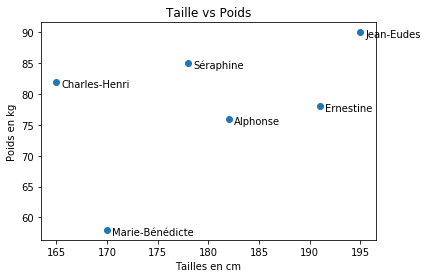

In [4]:
from matplotlib import pyplot as plt

tailles = [195, 178, 182, 191, 165, 170]
poids = [90, 85, 76, 78, 82, 58]
prénoms = ["Jean-Eudes", "Séraphine", "Alphonse", "Ernestine", "Charles-Henri", "Marie-Bénédicte"]

plt.scatter(tailles, poids)
for prénom, taille, poids in zip(prénoms, tailles, poids):
    plt.annotate(prénom,
                xy=(taille, poids),
                xytext=(5, -5),
                 textcoords = 'offset points')
    
plt.title("Taille vs Poids")
plt.xlabel("Tailles en cm")
plt.ylabel("Poids en kg")
plt.show()

---
#### Exercice 9: Comparaisons entre les émissions de NOX et de CO2

Le graphique a normalement mis en évidence ce qui semble être une relation linéaire entre la consommation moyenne et le taux d'émissions de CO2 (ce qui semble assez logique en y réfléchissant un peu).

Y a-t-il une relation similaire entre les émissions de monoxyde d'azote (NOX) et les émissions de dioxyde de carbone (CO2) ? Pour le voir, représenter sur un même nuage de points les moyennes de ces deux valeurs, par marques, en vous inspirant de l'exercice précédent.

---
#### Exercice 10: Étude plus fine des émissions de NOX

Représenter toutes les émissions de NOX ou de CO2 uniquement par leur valeurs moyennes n'est pas nécessairement très représentatif (on sait qu'il faut accorder une importance toute relative à la moyenne d'une série, en absence d'autres informations).

On se propose ici de représenter l'ensemble des émissions de NOX sur un même graphique, à l'aide de boîtes à moustaches. On placera sur un même graphique une boîte à moustache par marque, verticalement.

Chercher sur le web la documentation de matplotlib concernant les boîtes à moustaches (```boxplot``` en anglais).

**Bonus:** Retirer toutes les marques présentant moins de 30 modèles, afin de limiter la taille du graphique en ne gardant pas les échantillons les plus petits.